In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.11.0'

In [3]:
training="E:/assignment_data_science/CNN/Butterfly_&_Moths_classification/archive/train"
testing="E:/assignment_data_science/CNN/Butterfly_&_Moths_classification/archive/test"
validation="E:/assignment_data_science/CNN/Butterfly_&_Moths_classification/archive/valid"
Image_size=[224,224]

### Preprocessing the training set

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3,horizontal_flip=True)#This prevent for overfitting
training_set=train_datagen.flow_from_directory(training,target_size=(224,224),batch_size=32,class_mode="categorical")

Found 12639 images belonging to 100 classes.


### Preprocessing the test set

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
test_set=test_datagen.flow_from_directory(testing,target_size=(224,224),batch_size=32,class_mode="categorical")

Found 500 images belonging to 100 classes.


### Building the CNN

In [7]:
cnn=tf.keras.models.Sequential()

In [8]:
from glob import glob
glob

<function glob.glob(pathname, *, recursive=False)>

In [43]:
len(glob("E:/assignment_data_science/CNN/Butterfly_&_Moths_classification/archive/valid/*"))

100

### STEP-1------->Convolution

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=[224, 224, 3]))

### STEP-2-------> Pooling

In [11]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### Adding a second convolution layer

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### STEP-3------->Flattening

In [13]:
cnn.add(tf.keras.layers.Flatten())

### Step 4---------> Full connection

In [14]:
cnn.add(tf.keras.layers.Dense(units=128,activation="relu"))

### Step 5 ---------->Output layer

In [15]:
cnn.add(tf.keras.layers.Dense(units=100,activation="softmax"))

### Compiling the CNN

In [16]:
cnn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

### Training the CNN on the training set and evaluating it on the test set

In [18]:
mod=cnn.fit_generator(training_set,validation_data=test_set,epochs=50)

C:\Users\shiwam\AppData\Local\Temp\ipykernel_9656\1875098238.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  mod=cnn.fit_generator(training_set,validation_data=test_set,epochs=50)


Epoch 1/50
395/395 [==============================] - 457s 1s/step - loss: 0.6155 - accuracy: 0.8164 - val_loss: 1.0297 - val_accuracy: 0.7420
Epoch 2/50
395/395 [==============================] - 443s 1s/step - loss: 0.5956 - accuracy: 0.8202 - val_loss: 1.0563 - val_accuracy: 0.7480
Epoch 3/50
395/395 [==============================] - 440s 1s/step - loss: 0.5937 - accuracy: 0.8240 - val_loss: 0.9780 - val_accuracy: 0.7580
Epoch 4/50
395/395 [==============================] - 439s 1s/step - loss: 0.5699 - accuracy: 0.8317 - val_loss: 0.9424 - val_accuracy: 0.7820
Epoch 5/50
395/395 [==============================] - 441s 1s/step - loss: 0.5502 - accuracy: 0.8360 - val_loss: 0.9237 - val_accuracy: 0.7640
Epoch 6/50
395/395 [==============================] - 467s 1s/step - loss: 0.5357 - accuracy: 0.8393 - val_loss: 1.0333 - val_accuracy: 0.7740
Epoch 7/50
395/395 [==============================] - 448s 1s/step - loss: 0.5201 - accuracy: 0.8431 - val_loss: 1.0259 - val_accuracy: 0.7860

In [20]:
import matplotlib.pyplot as plt
import pickle

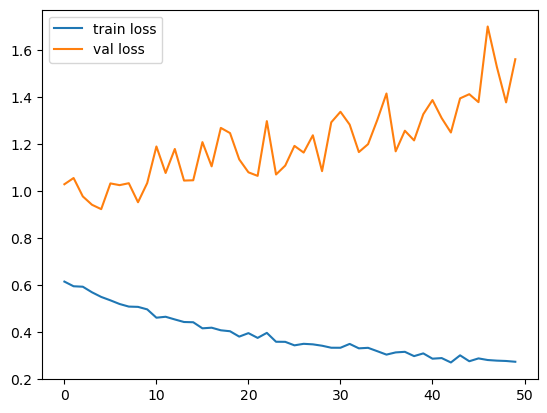

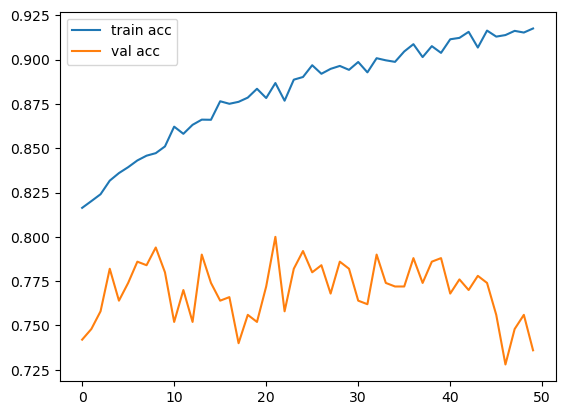

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the loss
plt.plot(mod.history['loss'], label='train loss')
plt.plot(mod.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(mod.history['accuracy'], label='train acc')
plt.plot(mod.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### Saving the model

In [51]:
import pickle
pickle.dump(cnn,open("moth_pickle.pkl","wb"))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-05 10:16:41         3085
metadata.json                                  2023-01-05 10:16:41           64
variables.h5            

In [52]:
cnn.save("butterfly.h5")

In [23]:
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.utils import load_img,img_to_array
import numpy as np

In [24]:
lab=training_set.class_indices
lab={k:v for v,k in lab.items()}
lab

{0: 'ADONIS',
 1: 'AFRICAN GIANT SWALLOWTAIL',
 2: 'AMERICAN SNOOT',
 3: 'AN 88',
 4: 'APPOLLO',
 5: 'ARCIGERA FLOWER MOTH',
 6: 'ATALA',
 7: 'ATLAS MOTH',
 8: 'BANDED ORANGE HELICONIAN',
 9: 'BANDED PEACOCK',
 10: 'BANDED TIGER MOTH',
 11: 'BECKERS WHITE',
 12: 'BIRD CHERRY ERMINE MOTH',
 13: 'BLACK HAIRSTREAK',
 14: 'BLUE MORPHO',
 15: 'BLUE SPOTTED CROW',
 16: 'BROOKES BIRDWING',
 17: 'BROWN ARGUS',
 18: 'BROWN SIPROETA',
 19: 'CABBAGE WHITE',
 20: 'CAIRNS BIRDWING',
 21: 'CHALK HILL BLUE',
 22: 'CHECQUERED SKIPPER',
 23: 'CHESTNUT',
 24: 'CINNABAR MOTH',
 25: 'CLEARWING MOTH',
 26: 'CLEOPATRA',
 27: 'CLODIUS PARNASSIAN',
 28: 'CLOUDED SULPHUR',
 29: 'COMET MOTH',
 30: 'COMMON BANDED AWL',
 31: 'COMMON WOOD-NYMPH',
 32: 'COPPER TAIL',
 33: 'CRECENT',
 34: 'CRIMSON PATCH',
 35: 'DANAID EGGFLY',
 36: 'EASTERN COMA',
 37: 'EASTERN DAPPLE WHITE',
 38: 'EASTERN PINE ELFIN',
 39: 'ELBOWED PIERROT',
 40: 'EMPEROR GUM MOTH',
 41: 'GARDEN TIGER MOTH',
 42: 'GIANT LEOPARD MOTH',
 43: 'GLITTER

### loading the model 

In [25]:
model1=load_model("butterfly.h5",compile=False)

In [26]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class=answer.argmax(axis=-1)
    y=" ".join(str(x) for x in y_class)
    y=int(y)
    res=print("Given butterfly is: ",lab[y])
    return res

In [47]:
img="E:/assignment_data_science/CNN/Butterfly_&_Moths_classification/archive/test/ATALA/3.jpg"

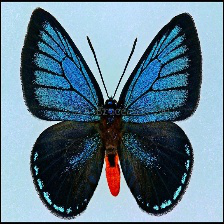

In [48]:

from PIL import Image
Image.open(img)

In [49]:
output(img)

1/1 [==============================] - 0s 176ms/step
Given butterfly is:  ATALA


In [ ]:
"E:\assignment_data_science\CNN\Butterfly_&_Moths_classification\archive\valid\SCARCE SWALLOW\4.jpg"

In [33]:
lab[1]

'AFRICAN GIANT SWALLOWTAIL'

In [28]:
print("Given butterfly is : ", lab[1])

Given butterfly is :  AFRICAN GIANT SWALLOWTAIL


In [47]:
MODEL_PATH ='butterfly.h5'

# Load your trained model
model = load_model(MODEL_PATH)

In [48]:
def model_predict(img_path, model):
    img = load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = img_to_array(img)
    # x = np.true_divide(x, 255)
    ## Scaling
    x=x/255
    x = np.expand_dims(x, axis=0)
   

   

    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    y=" ".join(str(z) for z in preds)
    y=int(y)
    res=print("Predicted butterfly is :",lab[y])
    return res


In [49]:
model_predict(img,model)

1/1 [==============================] - 0s 122ms/step
Predicted butterfly is : BLACK HAIRSTREAK
